In [68]:
# Here we import all libraries
import numpy as np
import gym
import matplotlib.pyplot as plt
import os
import torch
import random
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from collections import deque 
import sys
env = gym.make("CartPole-v0")

In [69]:
#Hyperparameters
episodes = 20000*5
eps = 1.0
learning_rate = 0.001
tot_rewards = []
tot_loss = []
decay_val = 0.0001
mem_size = 1000000
batch_size = 300
gamma = 0.99
max_steps = 200

In [70]:
class NeuralNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super(NeuralNetwork, self).__init__()
        self.state_size = state_size
        self.action_size = action_size
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(state_size, 300),
            nn.ReLU(),
            nn.Linear(300, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, action_size)
        )
    def forward(self, x):
        x = self.linear_relu_stack(x)
        return x

In [71]:
model = NeuralNetwork(env.observation_space.shape[0], env.action_space.n)
opt = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
replay_buffer = deque(maxlen=mem_size)

In [72]:
#Testing code

# state = torch.tensor(env.reset(), dtype=torch.float32)
# print("state = ", state)
# out = model(state)
# print("out = ", out)

In [73]:
def compute_td_loss(batch_size):
    state, next_state, reward, done, action = zip(*random.sample(replay_buffer, batch_size))
    state = torch.stack(list(state), dim=0).reshape(batch_size, -1)

    next_state = torch.from_numpy(np.array(next_state).reshape(batch_size, -1)).type(torch.float32)
    
    reward = torch.from_numpy(np.array(reward))
    done = torch.from_numpy(np.array(done)).long()
    action = torch.from_numpy(np.array(action)).type(torch.int64)
    
    q_values = model(state)
    next_q_values = model(next_state)

    q_vals = q_values.gather(dim=-1, index=action.reshape(-1,1)).reshape(-1, 1)
    max_next_q_values = torch.max(next_q_values,-1)[0].detach()

    loss = ((reward + gamma*max_next_q_values*(1-done) - q_vals.squeeze())**2).mean()

    opt.zero_grad()
    loss.backward()
    opt.step()
    return loss
    

Episode =  0  Epsilon =  1.0


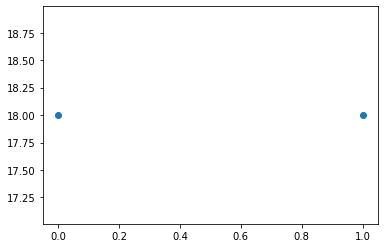

Episode =  1  Epsilon =  0.9982017088605984
Episode =  2  Epsilon =  0.995709445826304
Episode =  3  Epsilon =  0.9938194884036159
Episode =  4  Epsilon =  0.9905454529205154
Episode =  5  Epsilon =  0.9867887103646577
Episode =  6  Epsilon =  0.9836361908361013
Episode =  7  Epsilon =  0.9825548399448463
Episode =  8  Epsilon =  0.9809840876741331
Episode =  9  Epsilon =  0.978045692125449
Episode =  10  Epsilon =  0.9764821483624831
Episode =  11  Epsilon =  0.9752136097242452
Episode =  12  Epsilon =  0.9731679121611952
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  13  Epsilon =  0.9689924825139647
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  42  Epsilon =  0.9020414149961951
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  43  Epsilon =  0.9006894347102867
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  44  Epsilon =  0.8976324433094304
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  45  Epsilon =  0.8958390620693832
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new 

Episode =  69  Epsilon =  0.8351942089549953
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  70  Epsilon =  0.8337756558380129
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  71  Epsilon =  0.831527610194897
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  tor

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  91  Epsilon =  0.7645356859483627
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  92  Epsilon =  0.7633134679958135
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  93  Epsilon =  0.7599624339664685
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  to

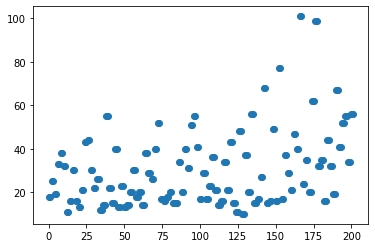

Episode =  101  Epsilon =  0.7333849854838415
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  102  Epsilon =  0.7281238394938323
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size(

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  117  Epsilon =  0.6626028940738161
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  118  Epsilon =  0.6610807346784378
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size(

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  130  Epsilon =  0.6023150379579673
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
ne

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  149  Epsilon =  0.5006913616678923
ne

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  178  Epsilon =  0.3116602244198222
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  179  Epsilon =  0.3105713746744658
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size(

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  184  Epsilon =  0.28194685049766977
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
n

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  189

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

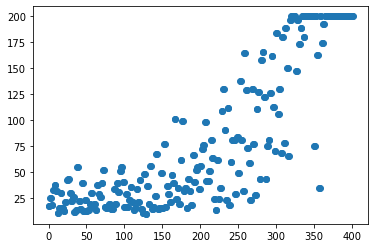

Episode =  201  Epsilon =  0.20068481216602052
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
n

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  221  Epsilon =  0.134808529581408
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  226  Epsilon =  0.121980411695544
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  242  Epsilon =  0.0917231431175302
new state =  torch.Size([300, 4])
ne

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  257  Epsilon =  0.0685791988541701
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
ne

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  267  Epsilon =  0.0561484605677297
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
ne

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  272  Epsilon =  0.05080548209664065
new state =  torch.Size([300, 4])
n

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  277  Epsilon =  0.04597093108115538
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  278  Epsilon =  0.045911

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  283

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  288  Epsilon =  0.03758929596355649
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
n

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  293  Epsilon =  0.034012371555550404
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])


new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

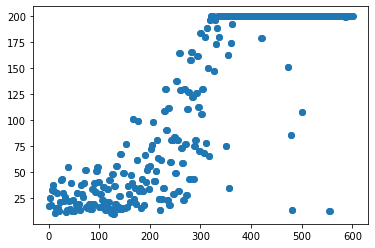

Episode =  301  Epsilon =  0.028986561388296073
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])


new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  307  Epsilon =  0.02619418361887839
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
n

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  312  Epsilon =  0.02370159597304967
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
n

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  317  Epsilon =  0.021446198127160365
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])


new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  322  Epsilon =  0.019405419560454926


new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  327  Epsilon =  0.01761511297815262
new state =  torch.Size([300, 4])
n

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  332  Epsilon =  0.016068515850793077
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])


new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  343  Epsilon =  0.013308078336824961
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])


new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  348  Epsilon =  0.012041707445686233
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])


new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  364  Epsilon =  0.009062911747036967
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])


new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  374  Epsilon =  0.008196403643210382
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])


new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  383  Epsilon =  0.0074887357583024745
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  392  Epsilon =  0.006797839440423672
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])


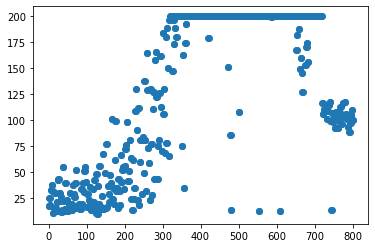

Episode =  401  Epsilon =  0.0062127854126777324
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  402  Epsilon =  0.006154661745132882
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  409  Epsilon =  0.0056036293817813545
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  414  Epsilon =  0.005108057124222887
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])


Episode =  419  Epsilon =  0.004621984327785397
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])


new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
Episode =  434  Epsilon =  0.003424101563443325
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])


new state =  torch.Size([300, 4])
Episode =  439  Epsilon =  0.003098270708041129
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])


new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  451  Epsilon =  0.0025215011510792613
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  464  Epsilon =  0.00207625156019311
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
n

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  474  Epsilon =  0.0017178501697878228
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  480  Epsilon =  0.0015497269551066513
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  493  Epsilon =  0.0012864520325292909
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

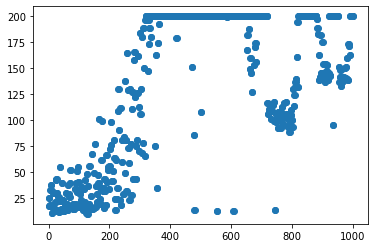

Episode =  501  Epsilon =  0.0011064930520714757
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

Episode =  511  Epsilon =  0.0009091050959691714
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  531  Epsilon =  0.0006749749598254666
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  537  Epsilon =  0.0006122131298674469
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  542

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  547  Epsilon =  0.0005064319481845528
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  552  Epsilon =  0.0004593419112067565
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  564  Epsilon =  0.0003770601435506687
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  570  Epsilon =  0.0003438856919748529
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  576  Epsilon =  0.00031172276561678135
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4]

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  583  Epsilon =  0.0002802885296662101
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])

new state =  torch.Size([300, 4])
Episode =  589  Epsilon =  0.00025598633659973803
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4]

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

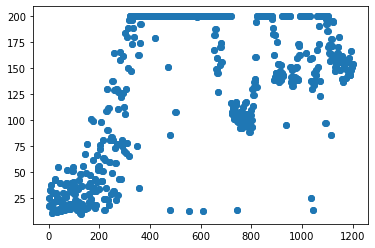

Episode =  601  Epsilon =  0.00021330715938804352
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4]

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  608  Epsilon =  0.0001927585278358611
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  615  Epsilon =  0.0001747826407581509
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  622  Epsilon =  0.00015919785804280163
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4]

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  629  Epsilon =  0.00014536566034485877
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4]

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  644  Epsilon =  0.00011881438053052326
new state =  torch.Size([300, 4]

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  651  Epsilon =  0.00010841506198282954
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4]

new state =  torch.Size([300, 4])
Episode =  658  Epsilon =  9.848180715784063e-05
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  665  Epsilon =  8.929778887053718e-05
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

Episode =  677  Epsilon =  7.343396053712559e-05
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  685  Epsilon =  6.593648240802114e-05
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  691  Epsilon =  5.98233920307824e-05
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])


Episode =  697  Epsilon =  5.454910854931452e-05
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])

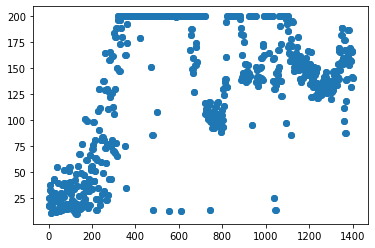

Episode =  701  Epsilon =  5.129044359057766e-05
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  708  Epsilon =  4.633091897726464e-05
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  723  Epsilon =  3.507271415901486e-05
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  728  Epsilon =  3.18146962242871e-05
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])


new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  768  Epsilon =  2.6653945218095106e-05
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  769  Epsilon =  2.662464346233868e-05
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  770  Epsilon =  2.660069325992039e-05
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  771  Epsilon =  2.657676460191063e-05
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  772  Epsilon =  2.655020244868426e-05
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  773  Epsilon =  2.65183629052431e-05
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([3

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  799  Epsilon =  2.2114787717257743e-05
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4]

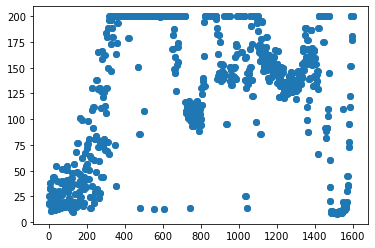

Episode =  801  Epsilon =  2.124769698035549e-05
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  812  Epsilon =  1.7309556735189904e-05
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4]

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  817  Epsilon =  1.5722040338406548e-05
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4]

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  822  Epsilon =  1.4324455133018276e-05
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4]

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  827  Epsilon =  1.2961367799689207e-05
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4]

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  832  Epsilon =  1.1727989209975773e-05
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4]

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  837  Epsilon =  1.0611976531721128e-05
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4]

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  842  Epsilon =  9.60216145270762e-06


new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  856  Epsilon =  7.257259102932948e-06
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  861  Epsilon =  6.566672419807192e-06
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  866  Epsilon =  5.94180062437475e-06
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])


new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  871  Epsilon =  5.376390415536637e-06
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  876  Epsilon =  4.864783544182964e-06
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
Episode =  886  Epsilon =  3.982987721713349e-06
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  891  Epsilon =  3.603974344809523e-06
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  896  Epsilon =  3.261027144833369e-06
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])


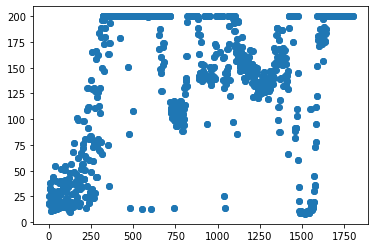

Episode =  901  Epsilon =  2.9507141344265253e-06
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4]

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  911  Epsilon =  2.41586456231132e-06
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])


new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  916  Epsilon =  2.185975582008362e-06
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  921  Epsilon =  1.9779623906420833e-06
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4]

new state =  torch.Size([300, 4])
Episode =  926  Epsilon =  1.7897433306185855e-06
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4]

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  931  Epsilon =  1.6194348308381654e-06
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4]

new state =  torch.Size([300, 4])
Episode =  936  Epsilon =  1.4653325571691872e-06
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4]

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  941  Epsilon =  1.3258943566062907e-06
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4]

Episode =  946  Epsilon =  1.1997248244293491e-06
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4]

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  951  Epsilon =  1.085561339921612e-06
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])

Episode =  956  Epsilon =  9.843262439627167e-07
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  988  Epsilon =  5.365113587647488e-07

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  994  Epsilon =  4.8696515903413e-07
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
n

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
Episode =  999  Epsilon =  4.406265001540467e-07
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])

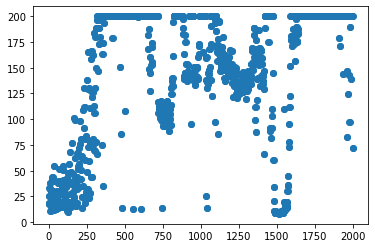

Episode =  1001  Epsilon =  4.288035711978087e-07
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4]

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

Episode =  1013  Epsilon =  3.540749140788546e-07
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4]

new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  torch.Size([300, 4])
new state =  t

KeyboardInterrupt: 

In [74]:
for i in range(episodes):
    print("Episode = ", i, " Epsilon = ", eps)
    state = torch.tensor(env.reset(), dtype=torch.float32).unsqueeze(0)

    done = False
    steps = 0
    eps_rew = 0 
    eps_loss = 0
    while not done and steps<max_steps:
        if np.random.uniform(0,1)<eps:
            action = env.action_space.sample()
        else:
#             action = env.action_space.sample()
            action = np.argmax(model(state).detach().numpy())
                

        next_state, reward, done, info = env.step(action)
        replay_buffer.append((state, next_state, reward, done, action))
        if len(replay_buffer)>batch_size and steps%4==0:
            loss = compute_td_loss(batch_size)
            eps_loss += loss.detach().numpy()
        eps = eps/(1 + decay_val)
        eps_rew += reward 
        
        if done:
            tot_rewards.append(eps_rew)
            break
        
        state = torch.tensor(next_state, dtype=torch.float32).unsqueeze(0)
        steps += 1
    tot_rewards.append(eps_rew)
    tot_loss.append(eps_loss)
    
    if(i%100)==0:
        plt.scatter(np.arange(len(tot_rewards)), tot_rewards)
#         plt.scatter(np.arange(len(tot_loss)), tot_loss)
        plt.show()

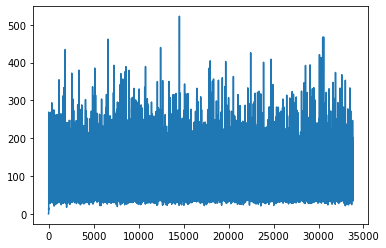

In [16]:
plt.plot(tot_loss)

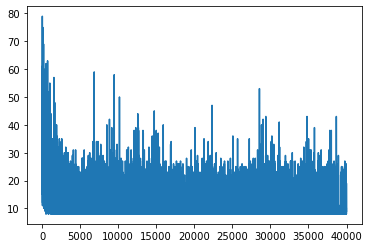

In [73]:
#Plot
plt.plot(tot_rewards)

In [75]:
#Render the final environment
state, info = env.reset(seed=42, return_info=True)
import time
for i in range(100):
    
    print("i = ", i)

    env.render()
    
    state = torch.tensor(state, dtype=torch.float32)
    action = np.argmax(model(state).detach().numpy())
    print("action = ", action)
    state, reward, done, info = env.step(action)

    if done:
        state, info = env.reset(return_info=True)
env.close()


i =  0


c:\users\thoma\anaconda3\envs\custom_atari_env\lib\site-packages\gym\core.py:58: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  "You are calling render method, "


action =  1
i =  1
action =  1
i =  2
action =  1
i =  3
action =  0
i =  4
action =  1
i =  5
action =  0
i =  6
action =  0
i =  7
action =  0
i =  8
action =  1
i =  9
action =  0
i =  10
action =  1
i =  11


c:\users\thoma\anaconda3\envs\custom_atari_env\lib\site-packages\gym\core.py:58: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  "You are calling render method, "


action =  0
i =  12
action =  0
i =  13
action =  1
i =  14
action =  0
i =  15
action =  1
i =  16
action =  0
i =  17
action =  1
i =  18
action =  0
i =  19
action =  1
i =  20
action =  0
i =  21
action =  1
i =  22
action =  0
i =  23
action =  1
i =  24
action =  0
i =  25
action =  1
i =  26
action =  0
i =  27
action =  1
i =  28
action =  0
i =  29
action =  0
i =  30
action =  0
i =  31
action =  0
i =  32
action =  0
i =  33
action =  1
i =  34
action =  1
i =  35
action =  1
i =  36
action =  1
i =  37
action =  1
i =  38
action =  1
i =  39
action =  1
i =  40
action =  0
i =  41
action =  1
i =  42
action =  0
i =  43
action =  0
i =  44
action =  1
i =  45
action =  0
i =  46
action =  0
i =  47
action =  1
i =  48
action =  0
i =  49
action =  1
i =  50
action =  0
i =  51
action =  1
i =  52
action =  0
i =  53
action =  0
i =  54
action =  0
i =  55
action =  1
i =  56
action =  0
i =  57
action =  1
i =  58
action =  1
i =  59
action =  0
i =  60
action =  1
i =  61
